In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
plt.style.use('thomas')

In [2]:
plt.style.use('thomas')

In [3]:
def Gaussian2D(l,b,p):
    A = p[0]
    l0 = p[1]
    sl = p[2]
    b0 = p[3]
    sb = p[4]
    val = p[0]*np.exp(-0.5*(l-l0)**2/sl**2 -0.5*(b-b0)**2/sb**2)
    return val

In [4]:
deg2rad = np.pi/180
# definition of image space

# minmax range for our data set is full sky
lmin,lmax = -180,180
bmin,bmax = -90,90

# SPI resolution is ~2.5 deg, here we oversample the resolution
binsize = 0.25
nl_pixels = int(360/binsize)
nb_pixels = int(180/binsize)
#npc = int(n_pixels/2)

bg = np.linspace(bmin,bmax,nb_pixels+1)
lg = np.linspace(lmin,lmax,nl_pixels+1)

b = (bg[1:]+bg[0:-1])/2
l = (lg[1:]+lg[0:-1])/2

# define 2D meshgrid for image coordinates
L_ARRg, B_ARRg = np.meshgrid(lg,bg)
L_ARR, B_ARR = np.meshgrid(l,b)

# define solid angle for each pixel for normalisations later
domega = (binsize*deg2rad)*(np.sin(np.deg2rad(B_ARR+binsize/2)) - np.sin(np.deg2rad(B_ARR-binsize/2)))

In [5]:
# disk
F_disk = 1.7e-3
l0_disk = 0
b0_disk = 0
sl_disk = 60
sb_disk = 10.5

par_disk = [1.,l0_disk,sl_disk,b0_disk,sb_disk]

map_disk = Gaussian2D(L_ARR,B_ARR,par_disk)

# renorm
map_disk = map_disk/np.sum(map_disk*domega)*F_disk

# check flux
print(np.sum(map_disk*domega))

0.0017000000000000014


In [6]:
# BB
F_BB = 7.3e-4
l0_BB = 0
b0_BB = 0
sl_BB = 8.7
sb_BB = 8.7

par_BB = [1.,l0_BB,sl_BB,b0_BB,sb_BB]

map_BB = Gaussian2D(L_ARR,B_ARR,par_BB)

# renorm
map_BB = map_BB/np.sum(map_BB*domega)*F_BB

# check flux
print(np.sum(map_BB*domega))

0.0007300000000000005


In [7]:
# NB
F_NB = 2.8e-4
l0_NB = -1.15
b0_NB = -0.25
sl_NB = 2.5
sb_NB = 2.5

par_NB = [1.,l0_NB,sl_NB,b0_NB,sb_NB]

map_NB = Gaussian2D(L_ARR,B_ARR,par_NB)

# renorm
map_NB = map_NB/np.sum(map_NB*domega)*F_NB

# check flux
print(np.sum(map_NB*domega))

0.0002800000000000001


In [8]:
# GCS
F_GCS = 8.2e-5
l0_GCS = -0.06
b0_GCS = -0.05
sl_GCS = 1.3
sb_GCS = 1.3

par_GCS = [1.,l0_GCS,sl_GCS,b0_GCS,sb_GCS]

map_GCS = Gaussian2D(L_ARR,B_ARR,par_GCS)

# renorm
map_GCS = map_GCS/np.sum(map_GCS*domega)*F_GCS

# check flux
print(np.sum(map_GCS*domega))

8.2e-05


In [9]:
map_tot = map_disk + map_BB + map_NB + map_GCS*1
print(np.sum(map_tot*domega))

0.002792000000000001


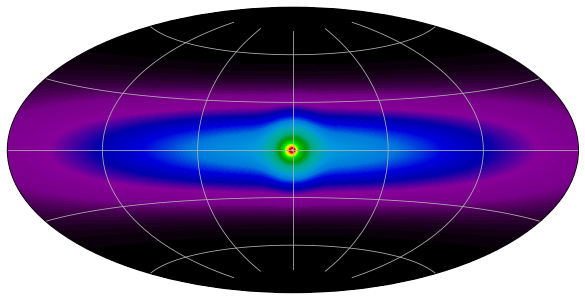

In [10]:
plt.figure(figsize=(10.24,7.68))

plt.subplot(projection='aitoff')
plt.pcolormesh(L_ARRg*deg2rad,B_ARRg*deg2rad,
               map_tot,
               #cmap=plt.cm.twilight_shifted,
               cmap=plt.cm.nipy_spectral,
               norm=colors.PowerNorm(0.33),
               rasterized=True)

plt.xticks(np.array([-120,-60,0,60,120])*deg2rad,labels=['','','','',''],color='lightgray')
plt.yticks(np.array([-60,-30,0,30,60])*deg2rad,labels=['','','','',''])

#plt.xlabel('Gal. Lon. [deg]')
#plt.ylabel('Gal. Lat. [deg]')
plt.grid()

plt.savefig('Siegert2016_511keVmap_nipy_spectral_cuberoot.pdf')

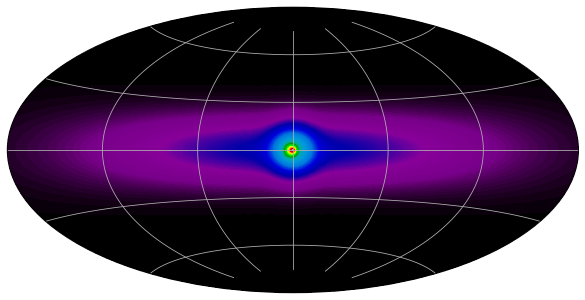

In [11]:
plt.figure(figsize=(10.24,7.68))

plt.subplot(projection='aitoff')
plt.pcolormesh(L_ARRg*deg2rad,B_ARRg*deg2rad,
               map_tot,
               #cmap=plt.cm.twilight_shifted,
               cmap=plt.cm.nipy_spectral,
               norm=colors.PowerNorm(0.5),
               rasterized=True)

plt.xticks(np.array([-120,-60,0,60,120])*deg2rad,labels=['','','','',''],color='lightgray')
plt.yticks(np.array([-60,-30,0,30,60])*deg2rad,labels=['','','','',''])

#plt.xlabel('Gal. Lon. [deg]')
#plt.ylabel('Gal. Lat. [deg]')
plt.grid()

plt.savefig('Siegert2016_511keVmap_nipy_spectral_squareroot.pdf')

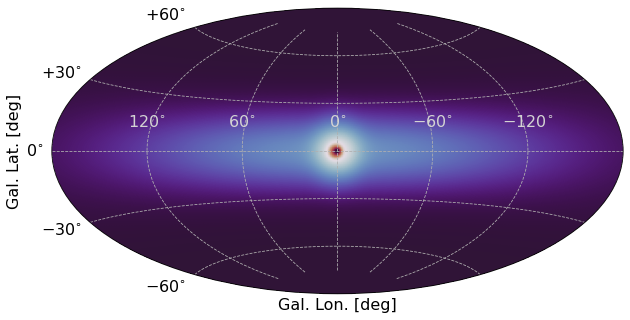

In [26]:
plt.figure(figsize=(10.24,7.68))

plt.subplot(projection='aitoff')
plt.pcolormesh(L_ARRg*deg2rad,B_ARRg*deg2rad,
               map_tot,
               cmap=plt.cm.twilight_shifted,
               #cmap=plt.cm.nipy_spectral,
               norm=colors.PowerNorm(0.33),
               rasterized=True)

plt.xticks(np.array([-120,-60,0,60,120])*deg2rad,labels=[r'$120^{\circ}$'+'\n',
                                                         r'$60^{\circ}$'+'\n',
                                                         r'$0^{\circ}$'+'\n',
                                                         r'$-60^{\circ}$'+'\n',
                                                         r'$-120^{\circ}$'+'\n'],color='lightgray')
plt.yticks(np.array([-60,-30,0,30,60])*deg2rad,labels=[r'$-60^{\circ}$',
                                                       r'$-30^{\circ}$',
                                                       r'$0^{\circ}$',
                                                       r'$+30^{\circ}$',
                                                       r'$+60^{\circ}$'])

plt.xlabel('Gal. Lon. [deg]')
plt.ylabel('Gal. Lat. [deg]')
plt.grid(linestyle='--')

plt.savefig('Siegert2016_511keVmap_twilight_shifted_cuberoot_labels.pdf')

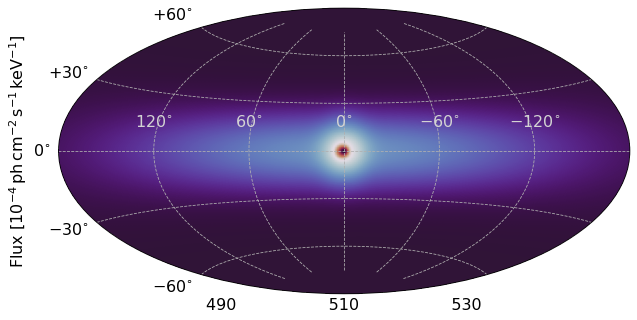

In [33]:
plt.figure(figsize=(10.24,7.68))

plt.subplot(projection='aitoff')
plt.pcolormesh(L_ARRg*deg2rad,B_ARRg*deg2rad,
               map_tot,
               cmap=plt.cm.twilight_shifted,
               #cmap=plt.cm.nipy_spectral,
               norm=colors.PowerNorm(0.33),
               rasterized=True)

plt.xticks(np.array([-120,-60,0,60,120])*deg2rad,labels=[r'$120^{\circ}$'+'\n',
                                                         r'$60^{\circ}$'+'\n',
                                                         r'$0^{\circ}$'+'\n',
                                                         r'$-60^{\circ}$'+'\n',
                                                         r'$-120^{\circ}$'+'\n'],color='lightgray')
plt.yticks(np.array([-60,-30,0,30,60])*deg2rad,labels=[r'$-60^{\circ}$',
                                                       r'$-30^{\circ}$',
                                                       r'$0^{\circ}$',
                                                       r'$+30^{\circ}$',
                                                       r'$+60^{\circ}$'])

plt.xlabel('490                  510                  530')
plt.ylabel(r'Flux [$10^{-4}\,\mathrm{ph\,cm^{-2}\,s^{-1}\,keV^{-1}}$]')
plt.grid(linestyle='--')



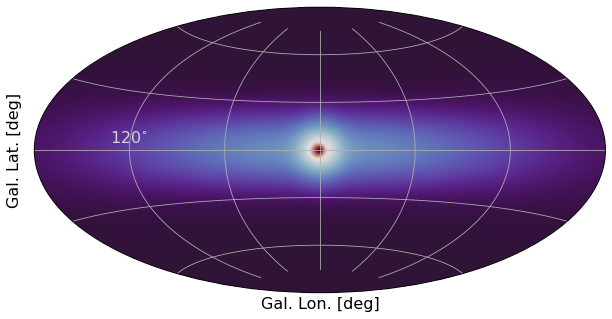

In [14]:
plt.figure(figsize=(10.24,7.68))

plt.subplot(projection='aitoff')
plt.pcolormesh(L_ARRg*deg2rad,B_ARRg*deg2rad,
               map_tot,
               cmap=plt.cm.twilight_shifted,
               #cmap=plt.cm.nipy_spectral,
               norm=colors.PowerNorm(0.33),
               rasterized=True)

plt.xticks(np.array([-120,-60,0,60,120])*deg2rad,labels=['','','','',''],color='lightgray')
plt.yticks(np.array([-60,-30,0,30,60])*deg2rad,labels=['','','','',''])

#plt.xlabel('Gal. Lon. [deg]')
#plt.ylabel('Gal. Lat. [deg]')
plt.grid()

plt.savefig('Siegert2016_511keVmap_twilight_shifted_cuberoot.pdf')

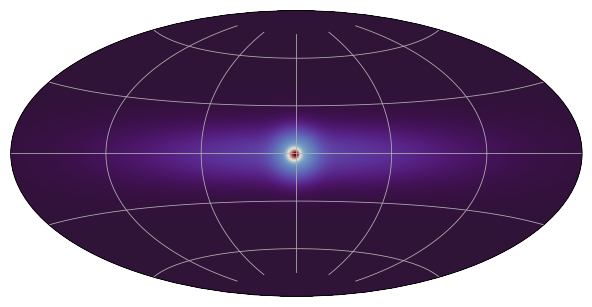

In [94]:
plt.figure(figsize=(10.24,7.68))

plt.subplot(projection='aitoff')
plt.pcolormesh(L_ARRg*deg2rad,B_ARRg*deg2rad,
               map_tot,
               cmap=plt.cm.twilight_shifted,
               #cmap=plt.cm.nipy_spectral,
               norm=colors.PowerNorm(0.5),
               rasterized=True)

plt.xticks(np.array([-120,-60,0,60,120])*deg2rad,labels=['','','','',''],color='lightgray')
plt.yticks(np.array([-60,-30,0,30,60])*deg2rad,labels=['','','','',''])

#plt.xlabel('Gal. Lon. [deg]')
#plt.ylabel('Gal. Lat. [deg]')
plt.grid()

plt.savefig('Siegert2016_511keVmap_twilight_shifted_squareroot.pdf')

In [31]:
np.where(map_tot == np.max(map_tot))

(array([182]), array([362]))

In [32]:
l[362],b[182]

(1.25, 1.25)

In [33]:
np.min(map_tot),np.max(map_tot)

(2.2058461468961044e-21, 1.095785007225646)